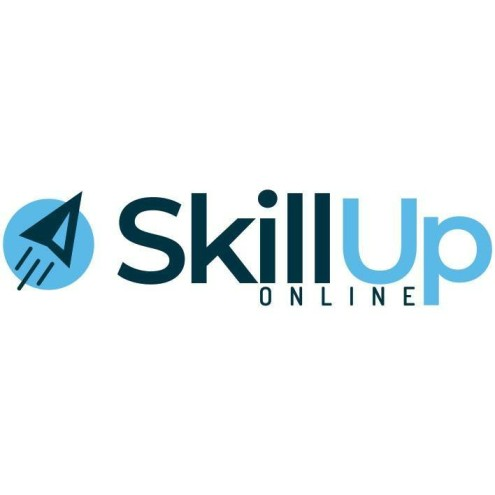


Dataset Link: https://www.kaggle.com/datasets/chakradharmattapalli/covid-19-cases

### Importing Necessary Libraries

In [1]:
#Write Your Code Here
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
import seaborn as sns

### Import and read dataset

In [3]:
import pandas as pd
data = pd.read_csv("Covid_19_cases4 (2).csv")
print(data)
print(data.head(10))

         dateRep  day  month  year  cases  deaths countriesAndTerritories
0     31-05-2021   31      5  2021    366       5                 Austria
1     30-05-2021   30      5  2021    570       6                 Austria
2     29-05-2021   29      5  2021    538      11                 Austria
3     28-05-2021   28      5  2021    639       4                 Austria
4     27-05-2021   27      5  2021    405      19                 Austria
...          ...  ...    ...   ...    ...     ...                     ...
2725  06-03-2021    6      3  2021   3455      17                  Sweden
2726  05-03-2021    5      3  2021   4069      12                  Sweden
2727  04-03-2021    4      3  2021   4884      14                  Sweden
2728  03-03-2021    3      3  2021   4876      19                  Sweden
2729  02-03-2021    2      3  2021   6191      19                  Sweden

[2730 rows x 7 columns]
      dateRep  day  month  year  cases  deaths countriesAndTerritories
0  31-05-2021   


<details><summary><b>Click Here for the Hint</b></summary>

 

```
Start by importing the pandas library: import pandas as pd
    
Use the read_csv() function to load the CSV file into a pandas DataFrame. Specify the file path in the parentheses, for example: pd.read_csv("file_path.csv")
    
Assign the resulting DataFrame to a variable name, for example: data = pd.read_csv("file_path.csv")
    
Use the head() method on the DataFrame to display the first 10 rows, for example: data.head(10)
    
Make sure to replace "file_path.csv" with the actual file path and name of your CSV file.

```

 

</details>

### Data Cleaning

a. Missing Value

In [4]:
import pandas as pd
data = pd.read_csv("Covid_19_cases4 (2).csv")
print(data.isnull().sum())

dateRep                    0
day                        0
month                      0
year                       0
cases                      0
deaths                     0
countriesAndTerritories    0
dtype: int64


<details><summary><b>Click Here for the Hint</b></summary>

 

```

    Use the DataFrame variable name followed by the isnull() method to create a Boolean DataFrame where True indicates a null value and False indicates a non-null value.

    Use the sum() method on the Boolean DataFrame to count the number of True values (i.e., the number of null values) in each column.

    Putting these together, the code would look like this: data.isnull().sum()


    This code assumes that the pandas DataFrame is named data. If your DataFrame has a different name, replace data with the appropriate variable name.

```

 

</details>

b. Duplicate data

In [6]:
import pandas as pd
data = pd.read_csv("Covid_19_cases4 (2).csv")
print(data.duplicated().sum())

0


<details><summary><b>Click Here for the Hint</b></summary>

 

```
Use the DataFrame variable name followed by the duplicated() method to create a Boolean DataFrame where True indicates a duplicate row and False indicates a non-duplicate row.

Use the sum() method on the Boolean DataFrame to count the number of True values (i.e., the number of duplicate rows).

Putting these together, the code would look like this: data.duplicated().sum()

This code assumes that the pandas DataFrame is named data. If your DataFrame has a different name, replace data with the appropriate variable name.

```

 

</details>

c. drop unecessary columns

In [9]:
import pandas as pd
data = pd.read_csv("Covid_19_cases4 (2).csv")
data.drop(["day", "month"], axis = 1, inplace = True)
data["dateRep"] = pd.to_datetime(data["dateRep"])
data.set_index("dateRep", inplace = True)
print(data.head())

            year  cases  deaths countriesAndTerritories
dateRep                                                
2021-05-31  2021    366       5                 Austria
2021-05-30  2021    570       6                 Austria
2021-05-29  2021    538      11                 Austria
2021-05-28  2021    639       4                 Austria
2021-05-27  2021    405      19                 Austria


### Data Analysis

1. Count the total number of cases and deaths in the dataset.

In [10]:
import pandas as pd
data = pd.read_csv("Covid_19_cases4 (2).csv")
total_cases = data["cases"].sum()
total_deaths = data["deaths"].sum()
print("Total Number Of Cases:", total_cases)
print("Total Number Of Deaths: ", total_deaths)

Total Number Of Cases: 9994560
Total Number Of Deaths:  178247


<details><summary><b>Click Here for the Hint</b></summary>

 

``` 
Use the sum() function to calculate the total number of COVID-19 cases and deaths. To do this, select the columns containing the cases and deaths data using the DataFrame column names and apply the sum() function to each column.

Store the results of the sum() function in two separate variables, one for total cases and one for total deaths.

Print the results using the print() function, along with a descriptive message indicating whether each number represents total cases or total deaths.
    
```

 

</details>

2. Calculate the percentage of cases and deaths by country.

In [20]:
import pandas as pd
covid_data = pd.read_csv("Covid_19_cases4 (2).csv")
grouped = covid_data.groupby("countriesAndTerritories")
total_cases = grouped["cases"].sum()
total_deaths = grouped["deaths"].sum()
case_percent = (total_cases / total_cases.sum()) * 100
death_percent = (total_deaths / total_deaths.sum()) * 100
covid_data["case_percent"] = covid_data["countriesAndTerritories"].map(case_percent)
covid_data["death_percent"] = covid_data["countriesAndTerritories"].map(death_percent)
percentages = covid_data[["countriesAndTerritories", "case_percent", "death_percent"]].drop_duplicates()
print(percentages)

     countriesAndTerritories  case_percent  death_percent
0                    Austria      1.845164       1.079962
91                   Belgium      2.882758       1.512508
182                 Bulgaria      1.713292       4.191375
273                  Croatia      1.132296       1.395816
364                   Cyprus      0.377205       0.072371
455                  Czechia      4.214503       5.407665
546                  Denmark      0.692257       0.086958
637                  Estonia      0.629502       0.366907
728                  Finland      0.347789       0.099300
819                   France     20.219079      12.890540
910                  Germany     12.347297      10.287410
1001                  Greece      2.103154       3.113657
1092                 Hungary      3.718153       8.232958
1183                 Iceland      0.005273       0.000561
1274                 Ireland      0.420799       0.348954
1365                   Italy     12.914405      15.903213
1456          

<details><summary><b>Click Here for the Hint</b></summary>

 

``` 
Use the groupby() function to group the data by country. Pass the column name containing the countries as an argument to the groupby() function.

Use the sum() function to calculate the total number of COVID-19 cases and deaths for each country. To do this, select the columns containing the cases and deaths data using the DataFrame column names and apply the sum() function to each column.

Create two new columns in the DataFrame to store the percentage of total cases and deaths for each country. To do this, divide the total number of cases and deaths for each country by the total number of cases and deaths across all countries, respectively. Multiply the result by 100 to convert to a percentage.

Select the columns containing the case and death percentages and print them using the print() function. To do this, use double square brackets to select the columns as a DataFrame.
    
```

 

</details>

3. Find the country with the highest number of cases and deaths.

In [22]:
import pandas as pd
df = pd.read_csv("Covid_19_cases4 (2).csv")
country_totals = df.groupby("countriesAndTerritories")["cases", "deaths"].sum()
max_cases_country = country_totals["cases"].idxmax()
max_deaths_country = country_totals["deaths"].idxmax()
max_cases = country_totals["cases"].max()
max_deaths = country_totals["deaths"].max()
print(f"The Country With The Highest Number Of COVID-19 cases is {max_cases_country} With {max_cases} cases")
print(f"The Country With The Highest Number Of COVID-19 cases is {max_deaths_country} With {max_deaths} cases")

C:\Users\ELCOT-Lenovo\AppData\Local\Temp\ipykernel_3944\2632207238.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  country_totals = df.groupby("countriesAndTerritories")["cases", "deaths"].sum()


The Country With The Highest Number Of COVID-19 cases is France With 2020808 cases
The Country With The Highest Number Of COVID-19 cases is Poland With 29969 cases


<details><summary><b>Click Here for the Hint</b></summary>

 

``` 
Use the groupby() function to group the data by country. Pass the column name containing the countries as an argument to the groupby() function.

Use the sum() function to calculate the total number of COVID-19 cases and deaths for each country. To do this, select the columns containing the cases and deaths data using the DataFrame column names and apply the sum() function to each column.

Use the idxmax() function to identify the country with the highest number of COVID-19 cases and deaths. To do this, select the cases and deaths columns from the country_totals DataFrame and apply the idxmax() function to each column. The idxmax() function returns the index (i.e., the country name) of the row with the highest value.

Store the results of the idxmax() function in separate variables, one for the country with the highest number of cases and one for the country with the highest number of deaths.

Use the max() function to calculate the highest number of COVID-19 cases and deaths. To do this, select the cases and deaths columns from the country_totals DataFrame and apply the max() function to each column.

Store the results of the max() function in separate variables, one for the highest number of cases and one for the highest number of deaths.

Print the results using the print() function, along with descriptive messages indicating which country has the highest number of cases and which country has the highest number of deaths. Use string interpolation to include the variables storing the country names and the variables storing the numbers of cases and deaths.
    

```

 

</details>

### Data Visualization

1. Find top five countries in terms of cases, store them in a new dataframe and Visualize them

  countriesAndTerritories  cases  deaths
0                 Austria    366       5
1                 Austria    570       6
2                 Austria    538      11
3                 Austria    639       4
4                 Austria    405      19
5                 Austria    287       8
6                 Austria    342       3
7                 Austria    520       3
8                 Austria    626       8
9                 Austria    671      12
  countriesAndTerritories    cases  deaths
0                  France  2020808   22977
1                   Italy  1290738   28347
2                 Germany  1234058   18337
3                  Poland  1164964   29969
4             Netherlands   557983    2055


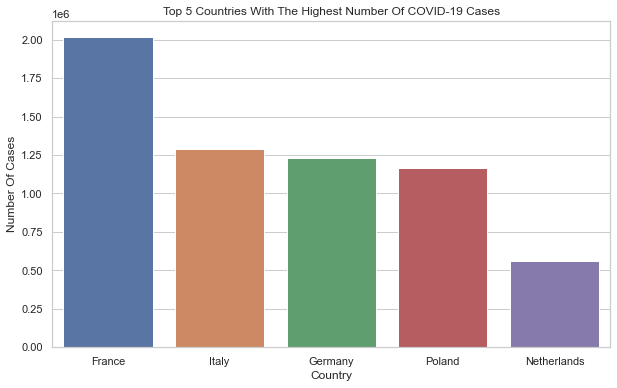

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

covid_data = pd.read_csv("Covid_19_cases4 (2).csv")
covid_cases = covid_data[["countriesAndTerritories", "cases", "deaths"]]

print(covid_cases.head(10))

country_totals = covid_cases.groupby("countriesAndTerritories").sum()
top_5_counteries = country_totals.sort_values(by = "cases", ascending = False).head(5)

top_5_counteries = top_5_counteries.reset_index()

print(top_5_counteries)

sns.set(style = "whitegrid")
plt.figure(figsize = (10,6))
ax = sns.barplot(x = "countriesAndTerritories", y = "cases", data = top_5_counteries)
ax.set(xlabel = "Country", ylabel = "Number Of Cases", title = "Top 5 Countries With The Highest Number Of COVID-19 Cases")
plt.show()

<details><summary><b>Click Here for the Hint</b></summary>

 

``` 
Create a new DataFrame containing only the columns cases, deaths, and countriesAndTerritories. To do this, use double square brackets to select the desired columns and assign the resulting DataFrame to a new variable.

Display the first 10 rows of the new DataFrame using the head() function.

Use the groupby() function to group the data by country. Pass the column name containing the countries as an argument to the groupby() function.

Use the sum() function to calculate the total number of COVID-19 cases and deaths for each country. To do this, select the columns containing the cases and deaths data using the DataFrame column names and apply the sum() function to each column.

Create a new DataFrame containing the total number of cases and deaths for each country. To do this, assign the output of the groupby() and sum() functions to a new variable.

Sort the new DataFrame by the number of cases in descending order using the sort_values() function. Assign the top 5 countries with the highest number of cases to a new variable.

Reset the index of the new DataFrame using the reset_index() function.

Use the print() function to display the new DataFrame containing the top 5 countries with the highest number of cases.

Create a bar plot using Seaborn to visualize the top 5 countries with the highest number of cases. To do this, use the sns.barplot() function and pass the x and y arguments to specify the DataFrame columns to be plotted.
```

 

</details>

2. Find top five countries in terms of deaths, store them in a new dataframe and Visualize them


  countriesAndTerritories  cases  deaths
0                 Austria    366       5
1                 Austria    570       6
2                 Austria    538      11
3                 Austria    639       4
4                 Austria    405      19
5                 Austria    287       8
6                 Austria    342       3
7                 Austria    520       3
8                 Austria    626       8
9                 Austria    671      12
  countriesAndTerritories    cases  deaths
0                  Poland  1164964   29969
1                   Italy  1290738   28347
2                  France  2020808   22977
3                 Germany  1234058   18337
4                 Hungary   371613   14675


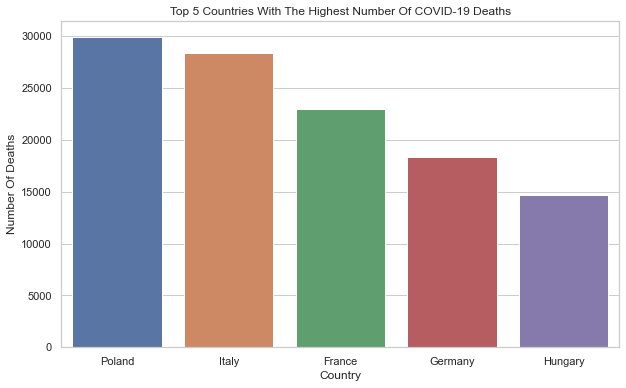

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

covid_data = pd.read_csv("Covid_19_cases4 (2).csv")
covid_cases = covid_data[["countriesAndTerritories", "cases", "deaths"]]

print(covid_cases.head(10))

country_totals = covid_cases.groupby("countriesAndTerritories").sum()
top_5_counteries = country_totals.sort_values(by = "deaths", ascending = False).head(5)

top_5_counteries = top_5_counteries.reset_index()

print(top_5_counteries)

sns.set(style = "whitegrid")
plt.figure(figsize = (10,6))
ax = sns.barplot(x = "countriesAndTerritories", y = "deaths", data = top_5_counteries)
ax.set(xlabel = "Country", ylabel = "Number Of Deaths", title = "Top 5 Countries With The Highest Number Of COVID-19 Deaths")
plt.show()

<details><summary><b>Click Here for the Hint</b></summary>

 

``` 
similarly as 1 but use 'deaths' column here.
```

 

</details>

## Model Development & Evaluation

In [17]:
#Write Your Code Here
# Resample to get total cases and deaths by date


# Split data into train and test sets

# Scale data
# scaler = StandardScaler()
# cases_train_scaled = scaler.fit_transform(cases_train.values.reshape(-1, 1))
# cases_test_scaled = scaler.transform(cases_test.values.reshape(-1, 1))
# deaths_train_scaled = scaler.fit_transform(deaths_train.values.reshape(-1, 1))
# deaths_test_scaled = scaler.transform(deaths_test.values.reshape(-1, 1))

# # Combine scaled cases and deaths into one array
# train_data_scaled = np.concatenate((cases_train_scaled, deaths_train_scaled), axis=1)
# test_data_scaled = np.concatenate((cases_test_scaled, deaths_test_scaled), axis=1)

# Fit Gradient Boosting Regressor model

# Make predictions

# Evaluate model



<details><summary><b>Click Here for the Hint</b></summary>

 

``` 
Resample the COVID-19 cases data by date using the pandas resample function to get the total cases and deaths by date.
Split the data into training and testing sets using the train_test_split function from the scikit-learn library.
Scale the training and testing data using the StandardScaler from the scikit-learn library to normalize the data.
Combine the scaled cases and deaths data into one array for both the training and testing data.
Fit a GradientBoostingRegressor model from the scikit-learn library on the training data.
Make predictions using the trained model on the testing data.
Evaluate the model's performance using the mean_squared_error and r2_score functions from the scikit-learn library.
Print out the root mean squared error and R2 score to assess the model's performance.
```

 

</details>

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

covid_data = pd.read_csv("Covid_19_cases4 (2).csv")

covid_data["dateRep"] = pd.to_datetime(covid_data["dateRep"])

# Resample to get total cases and deaths by date
covid_data_resampled = covid_data.resample('D', on= "dateRep").sum()

# Split data into train and test sets
train_data, test_data = train_test_split(covid_data_resampled, test_size=0.2, shuffle=False)

# Scale data
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# Combine scaled cases and deaths into one array
train_data_combined = np.concatenate((train_data_scaled[:,0].reshape(-1,1), train_data_scaled[:,1].reshape(-1,1)), axis=1)  # deaths
test_data_combined = np.concatenate((test_data_scaled[:,0].reshape(-1,1), test_data_scaled[:,1].reshape(-1,1)), axis=1)  # deaths

# Fit Gradient Boosting Regressor model
model = GradientBoostingRegressor(random_state=0)
model.fit(train_data_combined[:-1], train_data_combined[1:].ravel())

# Make predictions
predictions = model.predict(test_data_combined[:-1])

# Evaluate model
mse = mean_squared_error(test_data_combined[1:].ravel(), predictions)
rmse = np.sqrt(mse)
r2 = r2_score(test_data_combined[1:].ravel(), predictions)

print("Root Mean Squared Error: ", rmse)
print("R2 Score: ", r2)

ValueError: Found input variables with inconsistent numbers of samples: [267, 534]